# Star Wars Survey Analysis

## Introduction

This is an analysis of survey data to collected by [FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) to answer the question:
> **Does the rest of America realise that "The Empire Strikes Back" is clearly the best of the bunch?**

Using SurveyMonkey, they received 835 reponses that can be downloaded from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The dataset is encoded in `ISO-8859-1` and has columns including the following:

* `RespondentID` — An anonymized ID for the respondent (person taking the survey)
* `Gender` — the respondent's gender
* `Age` — the respondent's age
* `Household Income` — the respondent's income
* `Education` — the respondent's education level
* `Location (Census Region)` — the respondent's location
* `Have you seen any of the 6 films in the Star Wars franchise?` — a Yes or No response
* `Do you consider yourself to be a fan of the Star Wars film franchise?` — a Yes or No response

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the dataset into a DataFrame
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [3]:
# Review the first few rows of the dataset
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [4]:
# Examine the DataFrame column headers
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Cleaning and Mapping the 'Yes/No' Columns

In [5]:
# Convert selected columns to Boolean datatype
seen = 'Have you seen any of the 6 films in the Star Wars franchise?'
fan = 'Do you consider yourself to be a fan of the Star Wars film franchise?'
response_map = {
    'Yes': True,
    'No': False,
    'NaN': np.nan
}
star_wars[seen] = star_wars[seen].map(response_map)
star_wars[fan] = star_wars[fan].map(response_map)

In [6]:
star_wars[seen].value_counts(dropna=False)

Have you seen any of the 6 films in the Star Wars franchise?
True     936
False    250
Name: count, dtype: int64

In [7]:
star_wars[fan].value_counts(dropna=False)

Do you consider yourself to be a fan of the Star Wars film franchise?
True     552
NaN      350
False    284
Name: count, dtype: int64

## Cleaning and Mapping the Checkbox Columns

In [8]:
# Function to convert the values to True/False
def convert_films_seen(x):
    if isinstance(x, str) and x[:4] == 'Star':
        return True
    return False

In [9]:
# Loop through the 6 relevant column names and apply the conversion
seen_films_columns = [
    'Which of the following Star Wars films have you seen? Please select all that apply.',
    'Unnamed: 4',
    'Unnamed: 5',
    'Unnamed: 6',
    'Unnamed: 7',
    'Unnamed: 8'
]
for col in seen_films_columns:
    star_wars[col] = star_wars[col].apply(convert_films_seen)

In [10]:
# Define renaming dictionary
seen_films_headers = {}
for i in range(6):
    seen_films_headers[seen_films_columns[i]] = f"seen_{i + 1}"
seen_films_headers

{'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
 'Unnamed: 4': 'seen_2',
 'Unnamed: 5': 'seen_3',
 'Unnamed: 6': 'seen_4',
 'Unnamed: 7': 'seen_5',
 'Unnamed: 8': 'seen_6'}

In [11]:
# Rename the columns in the DataFrame
star_wars.rename(seen_films_headers, axis=1, inplace=True)

## Cleaning the Ranking Columns

In [12]:
# Convert the Ranking columns to the float datatype
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [13]:
ranking_columns = [col for col in star_wars.columns[9:15]]
ranking_columns

['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14']

In [14]:
# Define renaming dictionary
new_ranking_columns = {}
for i in range(6):
    new_ranking_columns[ranking_columns[i]] = f"ranking_{i + 1}"
new_ranking_columns

{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
 'Unnamed: 10': 'ranking_2',
 'Unnamed: 11': 'ranking_3',
 'Unnamed: 12': 'ranking_4',
 'Unnamed: 13': 'ranking_5',
 'Unnamed: 14': 'ranking_6'}

In [15]:
# Rename the columns in the DataFrame
star_wars.rename(new_ranking_columns, axis=1, inplace=True)

## Finding the Highest Ranked Movie

In [16]:
# Calculate the means of the rankings for each film
ranking_means = star_wars[star_wars.columns[9:15]].mean()

In [17]:
ranking_means

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

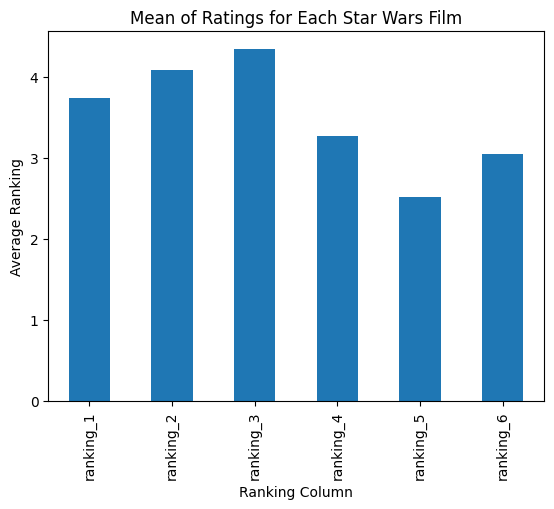

In [18]:
# Plot the means in a Bar plot
ranking_means.plot.bar(title='Mean of Ratings for Each Star Wars Film',
                       xlabel='Ranking Column',
                       ylabel='Average Ranking')
plt.show()

The 5th film in the franchise ('The Empire Strikes Back') is the highest ranked film.

In fact, all of the original trilogy films were more popular than the newer three films.

## Finding the Most Viewed Film

In [19]:
# List the 'seen' columns
seen_columns = [col for col in star_wars.columns if col.startswith('seen_')]
seen_columns

['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']

In [20]:
# Calculate the totals of the 'seen' columns
seen_totals = star_wars[seen_columns].sum()
seen_totals

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

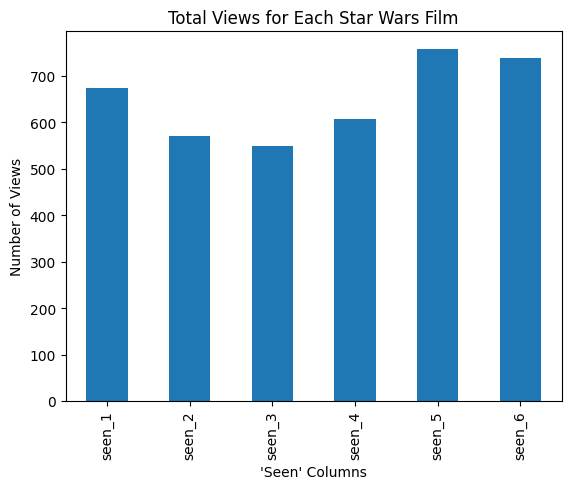

In [21]:
# Plot the totals in a bar chart
seen_totals.plot.bar(title='Total Views for Each Star Wars Film',
                     xlabel="'Seen' Columns",
                     ylabel='Number of Views')
plt.show()

In line with what was seen with the rankings, the original films have been viewed by more respondents, especially 'The Empire Strikes Back' and 'Return of the Jedi'.

## Exploring the Data by Binary Segments

In [22]:
# Investigate Star Trek fandom choices
col_name = 'Do you consider yourself to be a fan of the Star Trek franchise?'
trekkie = star_wars[star_wars[col_name] == 'Yes']
not_trekkie = star_wars[star_wars[col_name] == 'No']

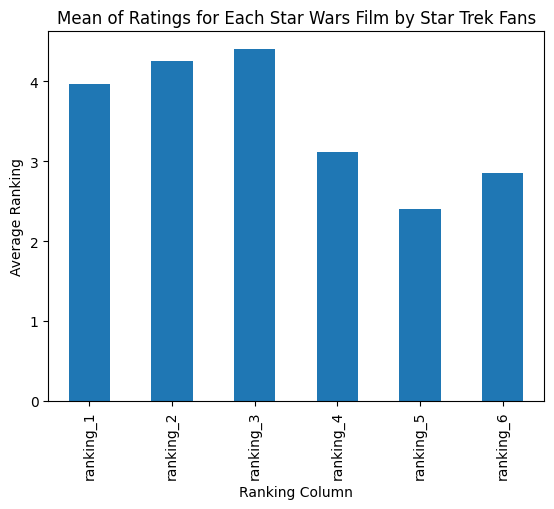

In [23]:
# Analyse Rankings for trekkies and non-treckies
trekkie_ranking_means = trekkie[trekkie.columns[9:15]].mean()
trekkie_ranking_means.plot.bar(title='Mean of Ratings for Each Star Wars Film by Star Trek Fans',
                       xlabel='Ranking Column',
                       ylabel='Average Ranking')
plt.show()

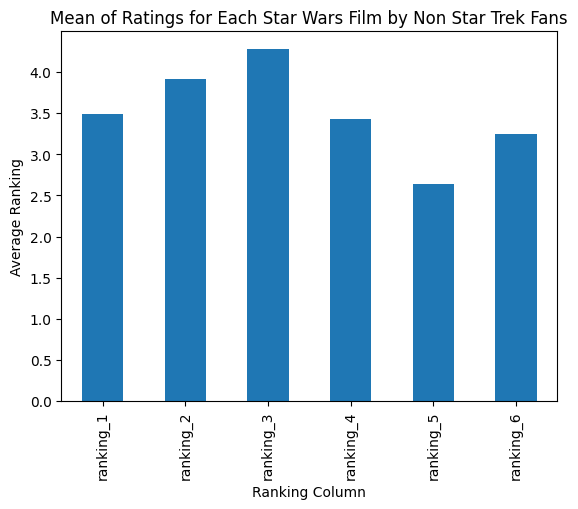

In [24]:
not_trekkie_ranking_means = not_trekkie[not_trekkie.columns[9:15]].mean()
not_trekkie_ranking_means.plot.bar(title='Mean of Ratings for Each Star Wars Film by Non Star Trek Fans',
                       xlabel='Ranking Column',
                       ylabel='Average Ranking')
plt.show()

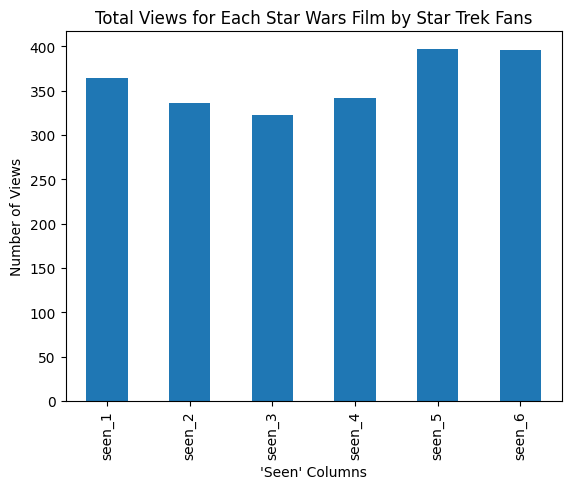

In [25]:
# Calculate the totals of the 'seen' columns
trekkie_seen_totals = trekkie[seen_columns].sum()
trekkie_seen_totals.plot.bar(title='Total Views for Each Star Wars Film by Star Trek Fans',
                     xlabel="'Seen' Columns",
                     ylabel='Number of Views')
plt.show()

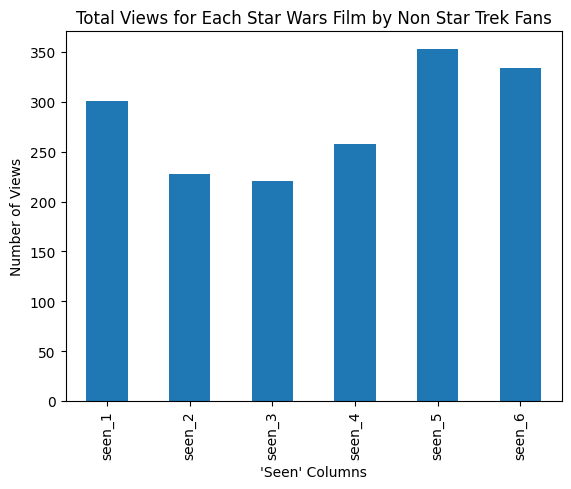

In [26]:
not_trekkie_seen_totals = not_trekkie[seen_columns].sum()
not_trekkie_seen_totals.plot.bar(title='Total Views for Each Star Wars Film by Non Star Trek Fans',
                     xlabel="'Seen' Columns",
                     ylabel='Number of Views')
plt.show()

There does not appear to be any impact on the views and rankings based on whether the respondents were fans of Star Trek or not.